In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [8]:
# Load the dataset
df = pd.read_csv("D:\data scientist\CUSTOMER CHURN PREDICTION\Churn_Modelling.csv")

# Display the first few rows of the dataset
df.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Display summary statistics
df.describe()

# Display information about the dataset
df.info()

# Check for missing values
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

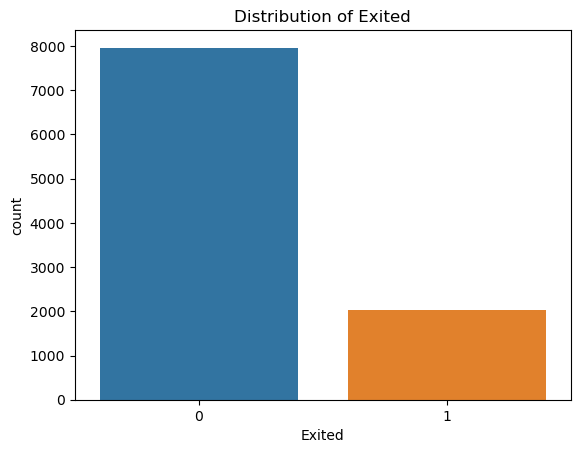

In [12]:
# Visualize the distribution of the target variable 'Exited'
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Exited')
plt.show()



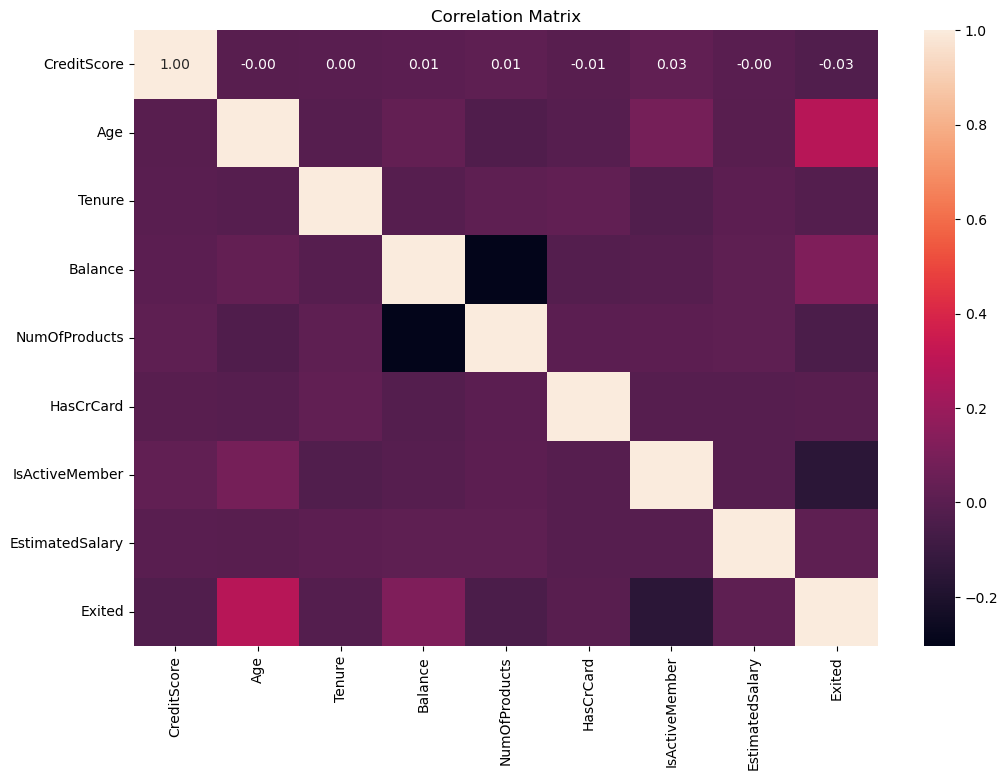

In [13]:
numeric_df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [25]:
# Check the column names again before dropping
print(df.columns)

# Drop unnecessary columns if they exist in the dataframe
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Encode categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Separate features and target variable
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [26]:


# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred_log_reg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Logistic Regression Confusion Matrix:
[[1559   48]
 [ 322   71]]
Logistic Regression Accuracy Score: 0.815


In [27]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Random Forest Confusion Matrix:
[[1545   62]
 [ 209  184]]
Random Forest Accuracy Score: 0.8645


In [28]:
# Train Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("Gradient Boosting Accuracy Score:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Gradient Boosting Confusion Matrix:
[[1547   60]
 [ 209  184]]
Gradient Boosting Accuracy Score: 0.8655


In [29]:
# Summarize the results
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log_reg),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb)
}

print("Model Performance Summary:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")


Model Performance Summary:
Logistic Regression: 0.8150
Random Forest: 0.8645
Gradient Boosting: 0.8655
